# CSE475 Project Bonus, Due: Monday, 05/02/2022

## Instruction

1. Please submit your Jupyter Notebook file (the. ipynb file) containing your code and the outputs produced by your code (note that .ipynb file can contain both the code and the outputs) to Canvas. Please name your file CSE475-ProjectBonus-LastName-FirstName.ipynb.

2. If you have any questions on the homework problems, you should post your question on the Canvas discussion board (under Project Q&A), instead of sending emails to the instructor or TA. We will answer your questions there. In this way, we can avoid repeated questions, and help the entire class stay on the same page whenever any clarification/correction is made.

## Building a Convolutional Neural Network to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building CNN

In this project we will build and train our convolutional neural network. In the first part, we walk through different layers and how they are configured. In the second part, you will build your own model, train it, and compare the performance.

In [35]:
from __future__ import print_function
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [37]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


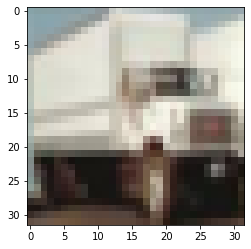

In [38]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [40]:
# convert class labels to one-hot vectors
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
# see some one-hot vector
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [42]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## First CNN
Below we will build our first CNN.  For demonstration purpose (so that it will br trained quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output. After a MaxPooling layer, we flatten, and then have a single fully connected layer before the final classification layer.

In [43]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation_12 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_13 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 3, 3, 32)          0         
                                                      

We still have 181K parameters, even though this is a "small" model.


In [44]:
batch_size = 128

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
391/391 [==============================] - 28s 70ms/step - loss: 1.8590 - accuracy: 0.3229 - val_loss: 1.5568 - val_accuracy: 0.4382
Epoch 2/15
391/391 [==============================] - 25s 64ms/step - loss: 1.5921 - accuracy: 0.4258 - val_loss: 1.4431 - val_accuracy: 0.4856
Epoch 3/15
391/391 [==============================] - 26s 67ms/step - loss: 1.4897 - accuracy: 0.4653 - val_loss: 1.3537 - val_accuracy: 0.5158
Epoch 4/15
391/391 [==============================] - 27s 68ms/step - loss: 1.4159 - accuracy: 0.4891 - val_loss: 1.3207 - val_accuracy: 0.5281
Epoch 5/15
391/391 [==============================] - 25s 65ms/step - loss: 1.3652 - accuracy: 0.5111 - val_loss: 1.2372 - val_accuracy: 0.5594
Epoch 6/15
391/391 [==============================] - 25s 65ms/step - loss: 1.3185 - accuracy: 0.5272 - val_loss: 1.2297 - val_accuracy: 0.5621
Epoch 7/15
391/391 [==============================] - 26s 68ms/step - loss: 1.2789 - accuracy: 0.5426 - val_loss: 1.1883 - val_accuracy:

In [45]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.01691734790802
Test accuracy: 0.6420999765396118


## Your task (25pts)

Our previous model (model_1) had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification (with activation functions and dropouts)

Please built a different model (named model_2) by trying different structures and different hyperparameters, such as number of neurons, layers, stride, padding, dropout rate, kernel size, learning rate, number of epochs, etc. You can choose to add data augmentation, batch normalization and/or something new.<br>

For example: <br>
A deeper model: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
<br>

Report the best test accuracy achieved. You will be graded on the highest test accuracy achieved:<br>
Test accuracy < Base model (model_1) : 0 - 5pts (Depending on the changes made in model_2)<br>
Base model (model_1) < Test accuracy < 70%: 5 - 10pts (Depending on the changes made in model_2)<br>
70% < Test accuracy < 75%: 15pts<br>
75% < Test accuracy: 25pts <br>

In [50]:
# Let's build a CNN using Keras' Sequential capabilities
model_2 = Sequential()

In [51]:
#write your code here
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='valid', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 activation_16 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 activation_17 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [54]:
batch_size = 128

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
391/391 [==============================] - 211s 537ms/step - loss: 0.5641 - accuracy: 0.8133 - val_loss: 0.8924 - val_accuracy: 0.7308
Epoch 2/30
391/391 [==============================] - 208s 533ms/step - loss: 0.5557 - accuracy: 0.8168 - val_loss: 0.9080 - val_accuracy: 0.7280
Epoch 3/30
391/391 [==============================] - 208s 532ms/step - loss: 0.5442 - accuracy: 0.8214 - val_loss: 0.9048 - val_accuracy: 0.7233
Epoch 4/30
391/391 [==============================] - 208s 531ms/step - loss: 0.5401 - accuracy: 0.8220 - val_loss: 0.9169 - val_accuracy: 0.7309
Epoch 5/30
391/391 [==============================] - 207s 530ms/step - loss: 0.5411 - accuracy: 0.8213 - val_loss: 1.0122 - val_accuracy: 0.6941
Epoch 6/30
391/391 [==============================] - 208s 532ms/step - loss: 0.5338 - accuracy: 0.8234 - val_loss: 0.9826 - val_accuracy: 0.7254
Epoch 7/30
391/391 [==============================] - 207s 530ms/step - loss: 0.5311 - accuracy: 0.8277 - val_loss: 1.0402 -

In [55]:
# Test the model on test data
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9271363019943237
Test accuracy: 0.7203999757766724
